In [14]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy.
'''

# import keras 
from __future__ import print_function
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta


# import numpy library
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

In [3]:
# CNN hyperparameters
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
# get data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert labels to one-hot representation
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# setup model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
# compile model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [17]:
# train model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 182s 385ms/step - loss: 2.2974 - accuracy: 0.1157 - val_loss: 2.2663 - val_accuracy: 0.2551
Epoch 2/2
469/469 [==============================] - 178s 379ms/step - loss: 2.2616 - accuracy: 0.1968 - val_loss: 2.2186 - val_accuracy: 0.3943


In [18]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.218583345413208
Test accuracy: 0.39430001378059387


In [19]:
# make predictions
predictions = model.predict(x_test)

In [20]:
# prepare images for plotting
print('x_test shape: ', x_test.shape)
x_test_plt = np.squeeze(x_test)
print('x_test_plt shape: ', x_test_plt.shape)
print('predictions: ', predictions.shape)

x_test shape:  (10000, 28, 28, 1)
x_test_plt shape:  (10000, 28, 28)
predictions:  (10000, 10)


prediction:  4


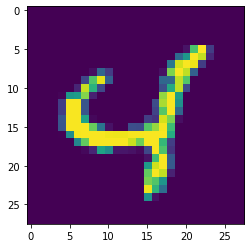

In [21]:
# see results
i = 67
plt.imshow(x_test_plt[i])
print('prediction: ', np.argmax(predictions[i]))